# Building a Logistic Regression

Create a logistic regression based on the bank data provided. 

The data is based on the marketing campaign efforts of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Note that the first column of the dataset is the index.

Source: [Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014


## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

ModuleNotFoundError: No module named 'statsmodels'

## Load the data

Load the ‘Example_bank_data.csv’ dataset.

In [2]:
data = pd.read_csv('Bank-data.csv')

We want to know whether the bank marketing strategy was successful, so we need to transform the outcome variable into 0s and 1s in order to perform a logistic regression.

In [3]:
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,no
1,1,0.767,0.0,0.0,2.0,1.0,274.0,yes
2,2,4.858,0.0,1.0,0.0,0.0,167.0,no
3,3,4.120,0.0,0.0,0.0,0.0,686.0,yes
4,4,4.856,0.0,1.0,0.0,0.0,157.0,no


In [4]:
data['y'] = data['y'].map({'yes': 1, 'no': 0})
data.head()

,Unnamed: 0,interest_rate,credit,march,may,previous,duration,y
0,0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4,4.856,0.0,1.0,0.0,0.0,157.0,0


In [5]:
# split the data
# split data in training and testing
targets = data['y']
inputs = data[['duration', 'previous', 'interest_rate']]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=365)

### Declare the dependent and independent variables

In [6]:
y = y_train
x1 = x_train
x = sm.add_constant(x1)
x_test = sm.add_constant(x_test)

C:\tools\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


### Simple Logistic Regression

Run the regression and visualize it on a scatter plot (no need to plot the line).

In [7]:
results = sm.Logit(y,x).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.389254
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  414
Model:                          Logit   Df Residuals:                      410
Method:                           MLE   Df Model:                            3
Date:                Fri, 25 Oct 2019   Pseudo R-squ.:                  0.4384
Time:                        20:48:37   Log-Likelihood:                -161.15
converged:                       True   LL-Null:                       -286.94
Covariance Type:            nonrobust   LLR p-value:                 2.971e-54
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.5207      0.293     -1.776      0.076      -1.095       0.054
duration          0.0062      0.001      8.590      0.000       0.005       0.008
previous          1.7905      0.570      3.144      0.002       0.674       2.907
interest_rate    -0.6739      0.088     -7.626      0.000      -0.847      -0.501
=================================================================================
"""

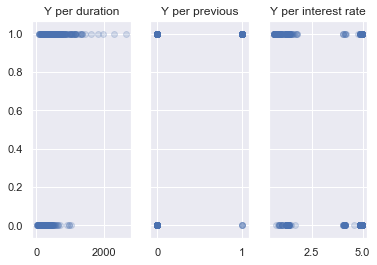

In [11]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True) #sharey -> share target as y
# ax1
ax1.scatter(x1['duration'],y, alpha=0.2)
ax1.set_title('Y per duration')
# ax2
ax2.scatter(x1['previous'], y,  alpha=0.2)
ax2.set_title('Y per previous')
# ax3
ax3.scatter(x1['interest_rate'], y,  alpha=0.2)
ax3.set_title('Y per interest rate')
plt.show() 

In [12]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
results.predict()

array([0.96, 0.56, 0.56, 0.35, 0.91, 0.08, 1.00, 0.91, 0.99, 0.32, 0.96,
       0.92, 0.39, 0.44, 0.03, 0.38, 0.05, 0.05, 0.99, 0.28, 0.07, 0.05,
       0.99, 0.17, 0.86, 0.17, 0.34, 0.62, 0.55, 0.83, 0.71, 0.76, 0.42,
       0.05, 0.03, 0.91, 0.29, 0.16, 0.72, 0.88, 0.32, 1.00, 0.94, 0.87,
       0.99, 0.09, 0.99, 0.05, 0.05, 1.00, 0.26, 0.49, 0.24, 0.50, 0.29,
       0.26, 0.93, 0.04, 0.32, 0.96, 0.67, 0.89, 0.86, 0.80, 1.00, 0.54,
       0.06, 0.29, 0.96, 0.78, 0.90, 0.05, 0.97, 0.04, 0.64, 0.61, 0.97,
       0.45, 0.04, 0.05, 0.02, 0.65, 0.41, 0.65, 0.15, 0.04, 0.10, 0.83,
       0.54, 0.39, 0.55, 0.89, 0.03, 0.03, 0.39, 0.03, 0.13, 0.26, 0.93,
       0.07, 0.12, 0.51, 0.05, 0.93, 0.04, 0.97, 0.83, 0.52, 0.99, 0.82,
       0.97, 0.04, 0.03, 0.39, 0.90, 1.00, 0.71, 0.15, 0.67, 0.04, 0.82,
       0.48, 0.98, 0.64, 0.85, 0.92, 0.03, 0.98, 0.84, 0.37, 0.14, 0.28,
       0.80, 0.03, 0.05, 0.81, 0.51, 0.88, 0.93, 0.51, 0.97, 0.19, 1.00,
       0.03, 0.63, 0.46, 0.92, 0.03, 0.79, 0.46, 0.

In [19]:
results.pred_table()

array([[168.00, 37.00],
       [30.00, 179.00]])

In [14]:
cm_df = pd.DataFrame(results.pred_table())
cm_df.columns = ['Predicted 0','Predicted 1']
cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,168.0,37.0
Actual 1,30.0,179.0


In [21]:
cm = np.array(cm_df)
# Calculate the accuracy of the model
accuracy_train = (cm[0,0]+cm[1,1])/cm.sum()
accuracy_train

0.8381642512077294

In [22]:
def confusion_matrix(data,actual_values,model):
        # Confusion matrix 
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and the accuracy
        return cm, accuracy

In [23]:
cm, acc = confusion_matrix(x_test, y_test, results)

In [24]:
cm, acc # confusion matrix and accuracy on test data set

(array([[46.00, 8.00],
        [6.00, 44.00]]), 0.8653846153846154)

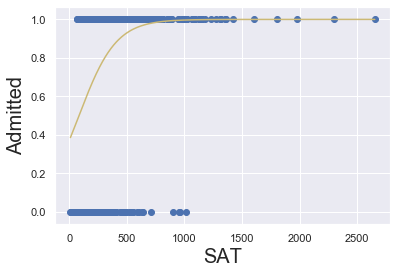

In [27]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1['duration'],results.params[0],results.params[1]))
x_sorted = np.sort(np.array(x1['duration']))

plt.scatter(x1['duration'],y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()